# Projeto - Análise de Vagas

### Disclaimer
Aqui estão reunidas as vagas de emprego para as quais realizei a submissão para a vaga.
As informações obtidas aqui, foram oriundas dos emails das próprias plataformas.
Alguns dados ainda faltam ser organizados, informações faltantes foram substituídas por N/A na planilha e CSV.
A planiha conta com os seguintes campos:
- Empresa: nome da empresa para qual foi feita a submissão
- Aplicação: plataforma usada para envio do currículo;
- Entrevista: se foi realizada alguma entrevista;
- Resposta: se a resposta final enviada foi genérica ou personaliza (classifiquei nesse primeiro momento, resposta genéricas sendo aquelas vindas da plataforma e personalizadas como sendo aquelas envidas com email corporativo do recrutador);
- Vaga: título da vaga como descrito pelo recrutador na plataforma;
- Etapa: etapa do processo seletivo de acordo com a plataforma de recrutamento;
- Remoto: se a vaga era trabalho remoto ou não;
- Senioridade: qual a senioridade para a vaga (caso a vaga possuir mais de uma senioridade, o preenchimento foi feito de acordo com a minha senioridade para a vaga;
- Data Submissão: data em que foi realizada a submissão para a vaga;
- Data Entrevista: data em que foi realizada a entevista;
- Data Resposta: data em que recebi a resposta sobre o processo de seleção:
- Data Visualização: data em que o recrutado visualizou a submissão;


Antes de começar as análises, foi preciso fazer alguns ajustes no CSV, sendo eles:

- O arquivo original estava separado por ponto e vírgula (;), foi realizada a subtituição para vírgula;
- Alguns campos possuiam vírgulas internamente, resultando em erro na leitura do campo, genrando um falso item extra no campo, acorreção foi feita retirando-se a virgula;
- Retirada dos acentos;

#### imports

In [72]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#para ignorar alguns avisos durante a plotagem dos gráficos
import warnings
warnings.filterwarnings('ignore')

#### arquivo usando (;) como separador

In [3]:
#arquivo usando (;) como separador

dfOff = pd.read_csv('VagasOff.csv')
dfOff.head(3)

,Empresa;Aplicacao;Entrevista;Resposta;Vaga;Etapa;Remoto;Senioridade;Data Submissao;Data Entrevista;Data Resposta;Data Visualizacao;
0,Belvo;LinkedIn;Sim;Personalizada;Python Develo...
1,Zyte;Workable;Sim;Personalizada;Python Develop...
2,Mobi2Buy;Gupy;Nao;N/A;Desenvolvedor Python;Cad...


#### arquivo ajustado (, como separador)

In [6]:
#arquivo ajustado

df = pd.read_csv('Vagas.csv')
df.head()

,Empresa,Aplicacao,Entrevista,Resposta,Vaga,Etapa,Remoto,Senioridade,Data Submissao,Data Entrevista,Data Resposta,Data Visualizacao,Unnamed: 12
0,Belvo,LinkedIn,Sim,Personalizada,Python Developer,NaN,Sim,NaN,06/12/2021,10/12/2021,13/12/2021,NaN,NaN
1,Zyte,Workable,Sim,Personalizada,Python Developer -Remote,NaN,Sim,NaN,09/12/2021,12/12/2021,07/03/2022,NaN,NaN
2,Mobi2Buy,Gupy,Nao,NaN,Desenvolvedor Python,Cadastro,Sim,NaN,13/12/2021,NaN,NaN,NaN,NaN
3,Compay Hero,Gupy,Nao,NaN,Desenvolvedor Python Junior,Cadastro,Sim,Junior,13/12/2021,NaN,NaN,NaN,NaN
4,WeRecruiter,Gupy,Nao,Generica,Desenvolvedore Python Junior,Resposta,Sim,Junior,13/12/2021,NaN,01/03/2022,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Empresa            152 non-null    object 
 1   Aplicacao          150 non-null    object 
 2   Entrevista         152 non-null    object 
 3   Resposta           39 non-null     object 
 4   Vaga               148 non-null    object 
 5   Etapa              22 non-null     object 
 6   Remoto             152 non-null    object 
 7   Senioridade        47 non-null     object 
 8   Data Submissao     136 non-null    object 
 9   Data Entrevista    3 non-null      object 
 10  Data Resposta      48 non-null     object 
 11  Data Visualizacao  36 non-null     object 
 12  Unnamed: 12        0 non-null      float64
dtypes: float64(1), object(12)
memory usage: 15.6+ KB


#### Removendo a coluna Unnamed: 12

In [5]:
del df['Unnamed: 12']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Empresa            152 non-null    object
 1   Aplicacao          150 non-null    object
 2   Entrevista         152 non-null    object
 3   Resposta           39 non-null     object
 4   Vaga               148 non-null    object
 5   Etapa              22 non-null     object
 6   Remoto             152 non-null    object
 7   Senioridade        47 non-null     object
 8   Data Submissao     136 non-null    object
 9   Data Entrevista    3 non-null      object
 10  Data Resposta      48 non-null     object
 11  Data Visualizacao  36 non-null     object
dtypes: object(12)
memory usage: 14.4+ KB


Pelas informçãoes apresentadas, podemos fazer alguns apontamentos:
- Foi feito o envio para 152 vagas;
- Foram realizadas 3 entrevista;
- Várias empresas não deram resposta sobre o resultado da seleção;

Vários Campos não possuem dados, vamos verificar a quantidade destes campo no DataFrame

#### Os campos que não possuem dados e a quantidade de dados faltantes, é a seguinte

In [7]:
df.isna().sum()

Empresa                0
Aplicacao              2
Entrevista             0
Resposta             113
Vaga                   4
Etapa                130
Remoto                 0
Senioridade          105
Data Submissao        16
Data Entrevista      149
Data Resposta        104
Data Visualizacao    116
dtype: int64

#### Gráfico mostrando a relação Empresas X Entrevistas x Respostas

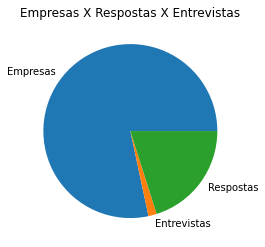

In [9]:
eer = np.array([df['Empresa'].count(), df['Data Entrevista'].count(), df['Resposta'].count()])
labels = 'Empresas', 'Entrevistas', 'Respostas'
fig, ax = plt.subplots()
ax.pie(eer, labels=labels)
ax.set_title('Empresas X Respostas X Entrevistas')
plt.show()

#### Descobrindo o intervalo de dias entre a submissão da vaga e a resposta final sobre a seleção

In [11]:
#data submissão
ds = pd.to_datetime(df['Data Submissao'], dayfirst=True).dropna(how='any', axis=0)
#data resposta
dr = pd.to_datetime(df['Data Resposta'], dayfirst=True).dropna(how='any', axis=0)

#data tempo resposta = data resposta - data sumissão
dtr = dr-ds

#dropando os dados nulos
dtr.dropna(how='any', axis=0)

0      7 days
1     88 days
4     78 days
10    14 days
21    23 days
22     3 days
26    21 days
31     9 days
40    51 days
42     4 days
44     0 days
46    52 days
48     5 days
56    12 days
58    10 days
64     4 days
71     6 days
75    43 days
79     3 days
83     3 days
90    57 days
97    10 days
98     3 days
100   10 days
103    7 days
104    0 days
115    3 days
121   17 days
124   33 days
135    4 days
136    6 days
143    1 days
145    4 days
149    1 days
dtype: timedelta64[ns]

In [17]:
#data resposta final
drf = dtr.dropna(how='any', axis=0)

#criando a coluna Intervalo
df['Intervalo'] = drf

#exibindo as informações da Data SUbmissão, Data visualização, Data Resposta, Intervalo
df[['Data Submissao', 'Data Visualizacao', 'Data Resposta', 'Intervalo']].dropna()

,Data Submissao,Data Visualizacao,Data Resposta,Intervalo
42,30/12/2021,30/12/2021,03/01/2022,4 days
44,31/12/2021,31/12/2021,31/12/2021,0 days
46,01/01/2022,01/01/2022,22/02/2022,52 days
48,01/01/2022,03/01/2022,06/01/2022,5 days
56,02/01/2022,02/01/2022,14/01/2022,12 days
104,12/01/2022,12/01/2022,12/01/2022,0 days
115,19/01/2022,19/01/2022,22/01/2022,3 days
121,31/01/2022,14/02/2021,17/02/2022,17 days


Com as informações acima, podemos fazer as seguintes observações:

- Uma empresa demorou 52 dias para dar a resposta final da seleção;
- Duas empresas deram a resposta no mesmo dia;

#### Verificando o tipo de resposta sobre o processo seletivo

In [18]:
df[['Data Submissao', 'Data Visualizacao', 'Data Resposta', 'Intervalo', 'Resposta']].dropna()

,Data Submissao,Data Visualizacao,Data Resposta,Intervalo,Resposta
44,31/12/2021,31/12/2021,31/12/2021,0 days,Generica
46,01/01/2022,01/01/2022,22/02/2022,52 days,Generica
48,01/01/2022,03/01/2022,06/01/2022,5 days,Generica
56,02/01/2022,02/01/2022,14/01/2022,12 days,Generica
104,12/01/2022,12/01/2022,12/01/2022,0 days,Generica
115,19/01/2022,19/01/2022,22/01/2022,3 days,Generica
121,31/01/2022,14/02/2021,17/02/2022,17 days,Generica


É observado que todas as resposta foram genéricas, não tiveram um direcionamento para o candidato e/ou falta de feeedback.

#### Quantidade de Submissões X Dia

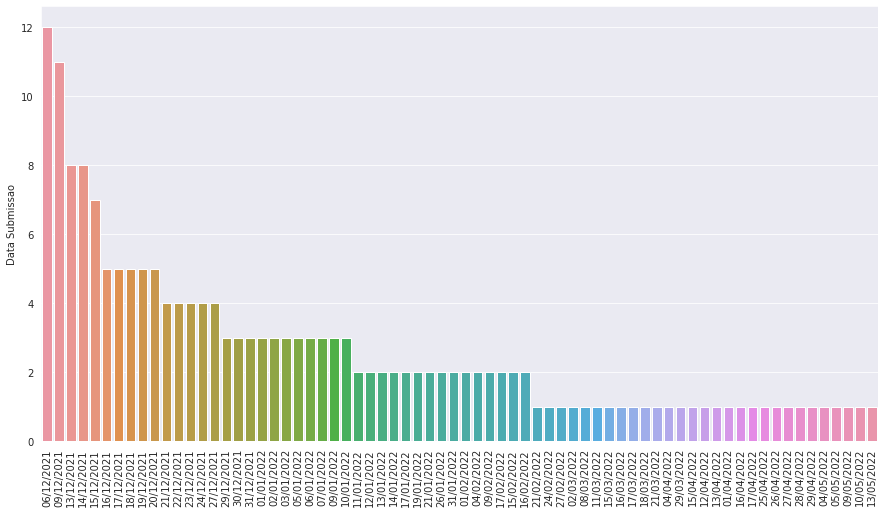

In [98]:
datas = df['Data Submissao'].dropna().unique()
quantidade = df['Data Submissao'].value_counts()

plt.figure(figsize= (15,8))
ax = sns.barplot(datas, quantidade)
plt.xticks(rotation=90)
plt.show()


KeyError: "None of [Index([('06/12/2021', '09/12/2021', '13/12/2021', '14/12/2021', '15/12/2021', '16/12/2021', '17/12/2021', '18/12/2021', '19/12/2021', '20/12/2021', '21/12/2021', '22/12/2021', '23/12/2021', '24/12/2021', '27/12/2021', '29/12/2021', '30/12/2021', '31/12/2021', '01/01/2022', '02/01/2022', '03/01/2022', '05/01/2022', '06/01/2022', '07/01/2022', '09/01/2022', '10/01/2022', '11/01/2022', '12/01/2022', '13/01/2022', '14/01/2022', '17/01/2022', '19/01/2022', '21/01/2022', '26/01/2022', '31/01/2022', '01/02/2022', '04/02/2022', '09/02/2022', '17/02/2022', '15/02/2022', '16/02/2022', '21/02/2022', '24/02/2022', '27/02/2022', '02/03/2022', '08/03/2022', '11/03/2022', '15/03/2022', '16/03/2022', '17/03/2022', '18/03/2022', '21/03/2022', '04/04/2022', '29/03/2022', '15/04/2022', '12/04/2022', '13/04/2022', '01/04/2022', '16/04/2022', '17/04/2022', '25/04/2022', '26/04/2022', '27/04/2022', '28/04/2022', '29/04/2022', '04/05/2022', '05/05/2022', '09/05/2022', '10/05/2022', '13/05/2022'), (12, 11, 8, 8, 7, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)], dtype='object')] are in the [columns]"